**Graduate Admissions Dataset**

Our analysis will help us in understand what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission from the features.

Lets load the dataset and take a look at it

In [2]:
import pandas as pd
df = pd.read_csv('datasets_14872_228180_Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Drop the irrelevant column (Serial No.) and check for null values

In [3]:
df = df.drop(['Serial No.'], axis=1)
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Ploting distribution of the features.

In [92]:
sns.set_style("darkgrid")

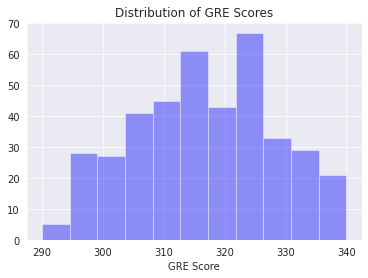

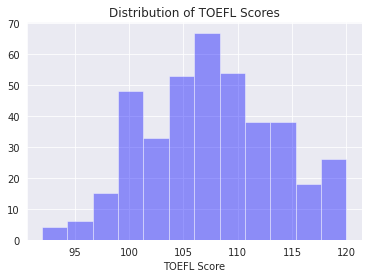

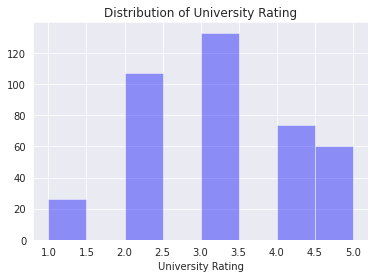

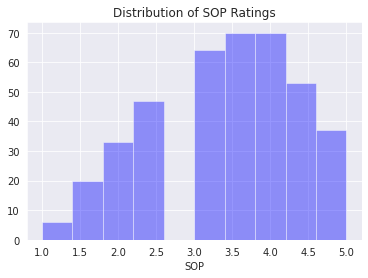

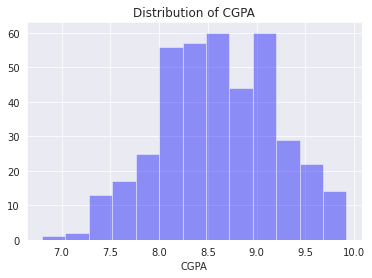

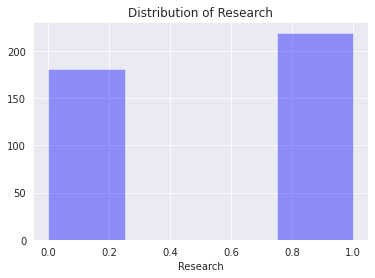

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = sns.distplot(df['GRE Score'],kde=False, color='b' )
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(df['TOEFL Score'], kde=False,color='b')
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(df['University Rating'], kde=False,color='b')
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(df['SOP'], kde=False,color='b')
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(df['CGPA'], kde=False,color='b')
plt.title("Distribution of CGPA")
plt.show()

fig = sns.distplot(df['Research'], kde=False,color='b')
plt.title("Distribution of Research")
plt.show()



It is clear from the distributions, students with varied merit apply for the university.


**Understanding the relation between different factors responsible for graduate admissions**

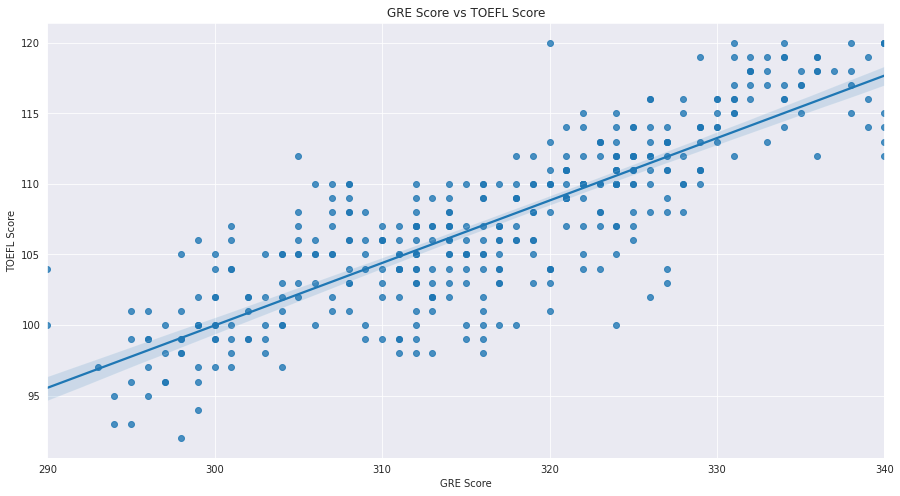

In [22]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
fig.figure.set_size_inches(15, 8)
plt.title("GRE Score vs TOEFL Score")
plt.show()

People with higher GRE Scores also have higher TOEFL Scores which indicates that students with high intellectual profociency also pocess great language ability.

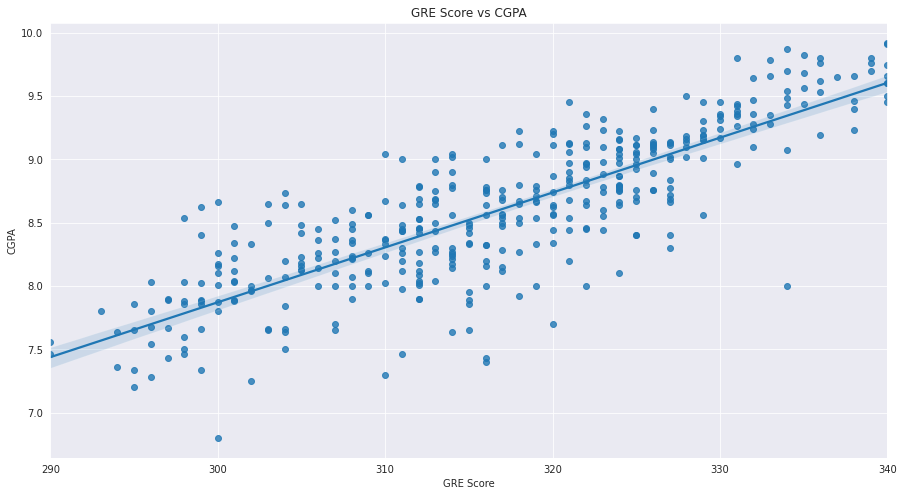

In [25]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
fig.figure.set_size_inches(15, 8)
plt.title("GRE Score vs CGPA")
plt.show()

Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they are smart or hard working

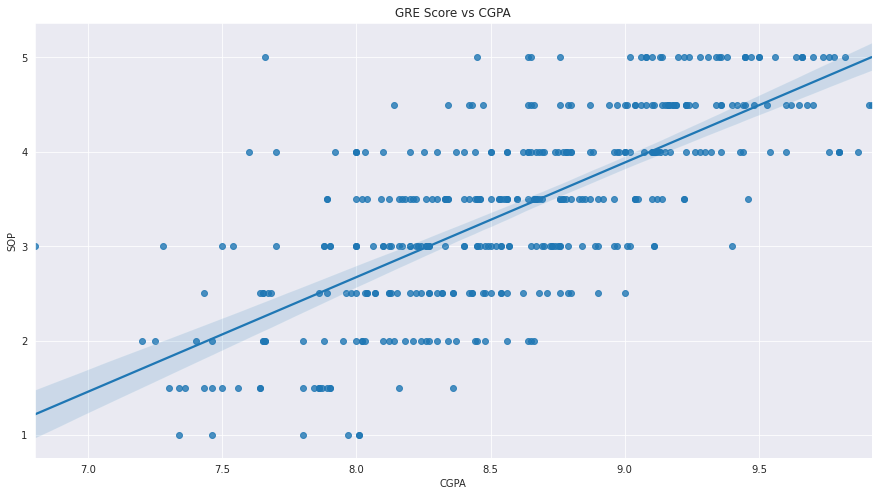

In [26]:
fig = sns.regplot(x="CGPA", y="SOP", data=df)
fig.figure.set_size_inches(15, 8)
plt.title("GRE Score vs CGPA")
plt.show()

CGPA and SOP are not that related because Statement of Purpose is related to academic performance, but since people with good CGPA tend to be more hard working so they have good things to say in their SOP which might explain the slight  move towards higher CGPA as along with good SOPs

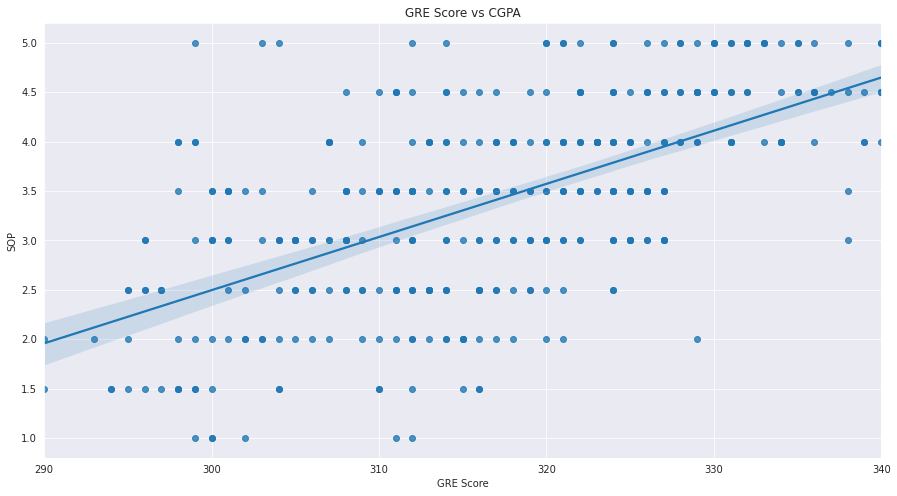

In [27]:
fig = sns.regplot(x="GRE Score", y="SOP", data=df)
fig.figure.set_size_inches(15, 8)
plt.title("GRE Score vs CGPA")
plt.show()

Similary, GRE Score and CGPA is only slightly related

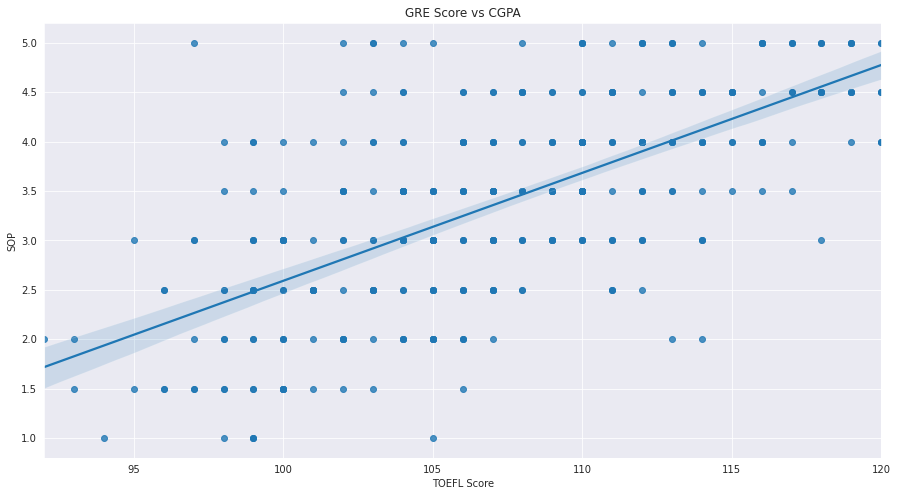

In [28]:
fig = sns.regplot(x="TOEFL Score", y="SOP", data=df)
fig.figure.set_size_inches(15, 8)
plt.title("GRE Score vs CGPA")
plt.show()

Applicants with different kinds of SOP have different kinds of TOEFL Score. So the quality of SOP is not always related to the applicants English skills.

**Correlation table among variables**

In [32]:
import numpy as np
corr = df.corr()
corr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


We can see that there are some high couple of feature with high correlative relationship of over 0.8 such as:
 - TOEFL vs GRE
 - CGPA vs GRE
 - TOEFL vs CGPA

Lets split the dataset with training and testing set and prepare the inputs and outputs

In [54]:
from sklearn.model_selection import train_test_split

features = df.iloc[:,:-1]
target = df.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size = 0.20, random_state=42)

Normalize the data using StandradScaler

In [55]:
from sklearn.preprocessing import StandardScaler

standerdizerX = StandardScaler()
standerdizerY = StandardScaler()

X_train= standerdizerX.fit_transform(X_train)
X_test= standerdizerX.transform(X_test)

y_train= standerdizerY.fit_transform(y_train)
y_test= standerdizerY.transform(y_test)

Lets use a Lineear Regression to predict first

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
print('MSE: ',mean_squared_error(y_test, y_pred))

MSE:  0.2443111527031876


Something as simple as Linear Regression performs quite good in this case

Now try using a Neural Network with 
  - Three hidden layers, each of 10 nodes 
  - ReLU activation function
  - Adam otimizer funtionn
  - Loss functions is Mean Square Error

In [83]:
import keras
from keras.models import Sequential
from keras.layers import Dense

numFeature = X_train.shape[1]
neuralnet = Sequential()
neuralnet.add(Dense(10, activation='relu', input_shape=(numFeature,)))
neuralnet.add(Dense(10, activation='relu'))
neuralnet.add(Dense(10, activation='relu'))
neuralnet.add(Dense(1))
neuralnet.compile(optimizer='adam', loss='mean_squared_error')

Noew Train the Neural Net Model with 100 epochs,  and evaluate the model with MSE

In [84]:
neuralnet.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
10/10 [==============================] - 0s 1ms/step - loss: 1.0795
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 0.8804
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 0.7276
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 0.5828
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.4621
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3577
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2921
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2637
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2541
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2506
Epoch 11/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2468
Epoch 12/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2433
Epoch 13/100
10/10 [=================

In [85]:
mse=neuralnet.evaluate(X_test, y_test)
print('MSE: ',mse)

3/3 [==============================] - 0s 2ms/step - loss: 0.2369
MSE:  0.23688311874866486


As we can see the MSE of the Neural Net Model is **0.236**, which is just slightly better than the classic Linear Regression model with MSE of **0.2443**